In [1]:
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
# Load images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

In [3]:
# Create a histogram
def plot_histogram(images):
    pixel_values = []
    for img in images:
        pixel_values.extend(img.flatten())
    plt.hist(pixel_values, bins=256, range=[0, 256], color='gray', alpha=0.7)
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()


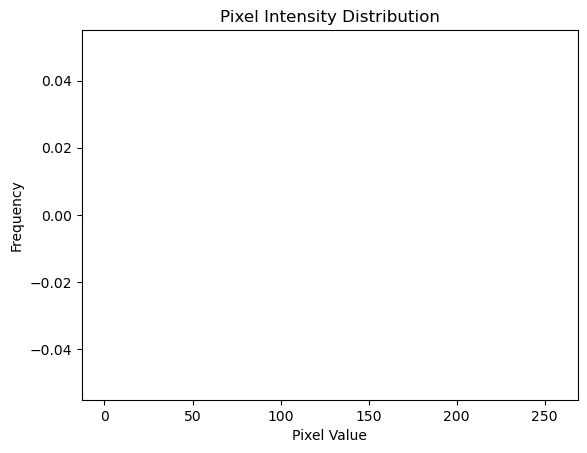

In [5]:
# Load images and plot histogram
images = load_images_from_folder('DataSet/Training')
plot_histogram(images)

In [6]:
import seaborn as sns
import pandas as pd


In [7]:
data = {
    'Category': ['No Tumor', 'Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor'],
    'Count': [200, 150, 180, 170]  # Replace with actual counts
}

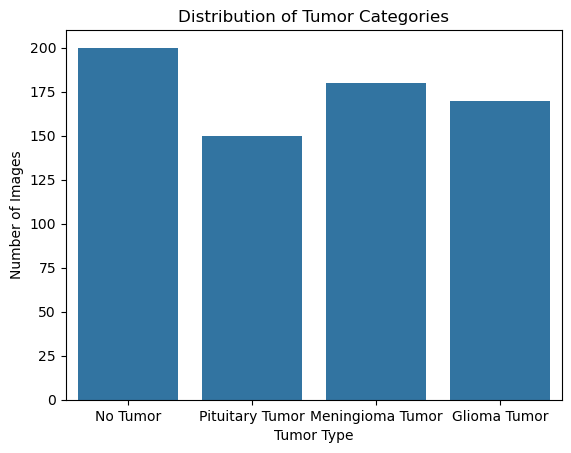

In [8]:

df = pd.DataFrame(data)

# Create a bar chart
sns.barplot(x='Category', y='Count', data=df)
plt.title('Distribution of Tumor Categories')
plt.xlabel('Tumor Type')
plt.ylabel('Number of Images')
plt.show()

In [9]:
# Example dataset with features
feature_data = {
    'Tumor Size': [1.2, 3.5, 2.1, 4.0, 2.9, 1.5],  # Example sizes
    'Intensity Mean': [120, 150, 130, 200, 160, 140]  # Example intensities
}

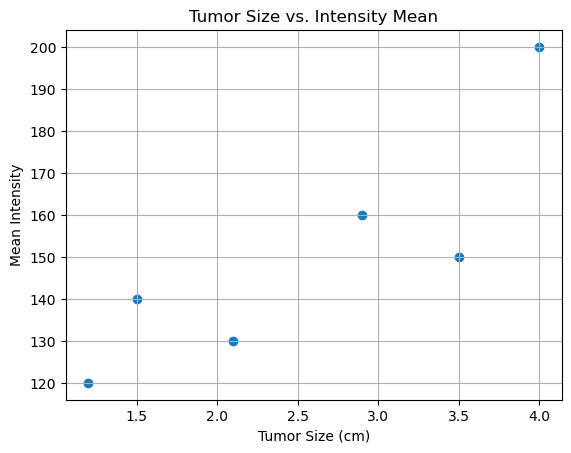

In [10]:
df_features = pd.DataFrame(feature_data)

# Create a scatter plot
plt.scatter(df_features['Tumor Size'], df_features['Intensity Mean'])
plt.title('Tumor Size vs. Intensity Mean')
plt.xlabel('Tumor Size (cm)')
plt.ylabel('Mean Intensity')
plt.grid()
plt.show()

Data types before conversion:
Intensity     int64
Category     object
dtype: object

Data types after conversion:
Intensity     int64
Category     object
dtype: object


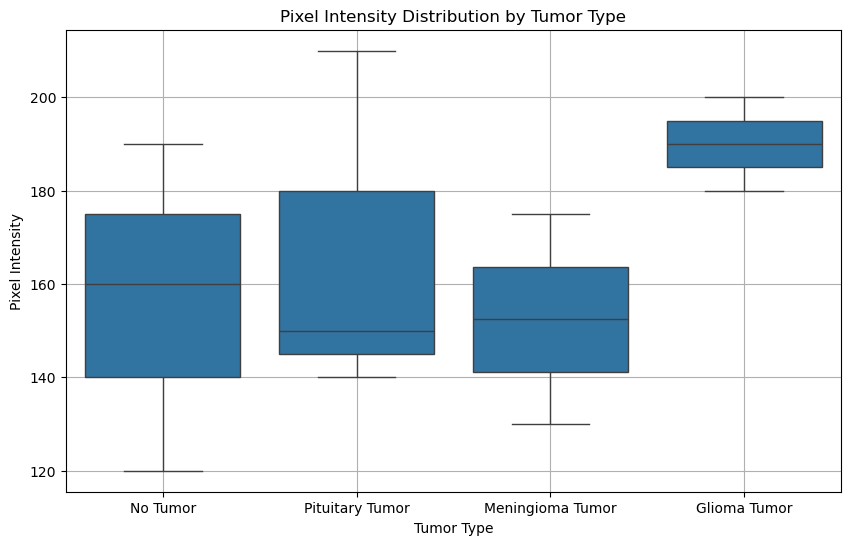

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset with pixel intensity values and their corresponding categories
data = {
    'Intensity': [120, 150, 130, 200, 160, 140, 175, 180, 190, 210],  # Replace with actual intensity values
    'Category': ['No Tumor', 'Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor', 
                 'No Tumor', 'Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor', 
                 'No Tumor', 'Pituitary Tumor']  # Corresponding tumor types
}

# Create a DataFrame
df_box = pd.DataFrame(data)

# Check the data types
print("Data types before conversion:")
print(df_box.dtypes)

# Convert 'Intensity' to numeric, coercing errors to NaN
df_box['Intensity'] = pd.to_numeric(df_box['Intensity'], errors='coerce')

# Remove NaN values
df_box = df_box.dropna()

# Verify the data types after conversion
print("\nData types after conversion:")
print(df_box.dtypes)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Intensity', data=df_box)
plt.title('Pixel Intensity Distribution by Tumor Type')
plt.xlabel('Tumor Type')
plt.ylabel('Pixel Intensity')
plt.grid()
plt.show()


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,          # Normalization
    rotation_range=15,       # Random rotation
    width_shift_range=0.1,   # Random width shift
    height_shift_range=0.1,  # Random height shift
    shear_range=0.2,         # Random shearing
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    fill_mode='nearest'      # Fill mode for new pixels
)

# Assuming you have a directory of images for training
train_generator = datagen.flow_from_directory(
    'DataSet/Training',           # Target directory
    target_size=(128, 128), # Resize images
    batch_size=32,   # Set batch size
    class_mode='categorical' # Set type of label arrays
)


Found 2870 images belonging to 4 classes.


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,          # Normalization
    rotation_range=15,       # Random rotation
    width_shift_range=0.1,   # Random width shift
    height_shift_range=0.1,  # Random height shift
    shear_range=0.2,         # Random shearing
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    fill_mode='nearest'      # Fill mode for new pixels
)

# Assuming you have a directory of images for training
train_generator = datagen.flow_from_directory(
    'DataSet/Testing',           # Target directory
    target_size=(128, 128), # Resize images
    batch_size=32,   # Set batch size
    class_mode='categorical' # Set type of label arrays
)


Found 395 images belonging to 4 classes.
